In [ ]:
!pip install PyShp
!pip install contextily
!pip install geopandas
!pip install scikit-learn
!pip install pmdarima
!pip install dbfread

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import seaborn as sns

from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

from numpy import sqrt
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

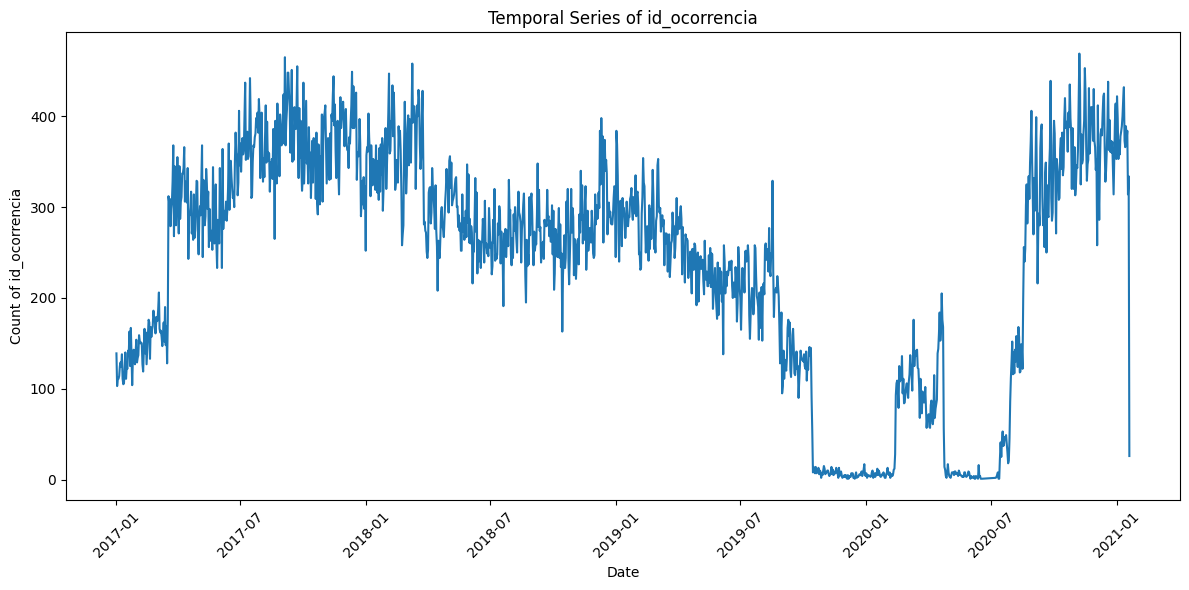

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Dates' column to datetime objects if it's not already
df['Dates'] = pd.to_datetime(df['Dates'])

# Group by 'Dates' and count the number of 'id_ocorrencia' for each date
temporal_series = df.groupby('Dates')['id_ocorrencia'].count()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(temporal_series.index, temporal_series.values)
plt.xlabel('Date')
plt.ylabel('Count of id_ocorrencia')
plt.title('Temporal Series of id_ocorrencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

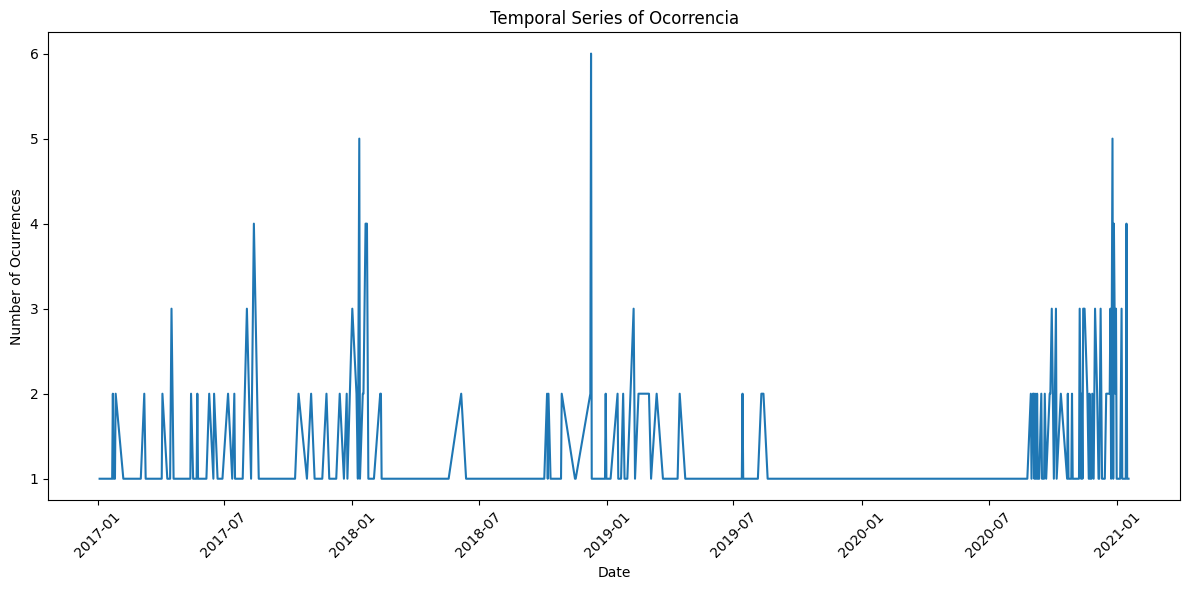

In [ ]:
# prompt: plot a temporal series using df, using a count of ids

# Assuming 'df' is your DataFrame and it has a 'Dates' column representing the time series
# and an 'id_ocorrencia' column to count.

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Dates' column to datetime objects if it's not already
dfCopy['Dates'] = pd.to_datetime(dfCopy['Dates'])

# Group by 'Dates' and count the number of 'id_ocorrencia' for each date
temporal_series = dfCopy.groupby('Dates')['id_ocorrencia'].count()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(temporal_series.index, temporal_series.values)
plt.xlabel('Date')
plt.ylabel('Number of Ocurrences')
plt.title('Temporal Series of Ocorrencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

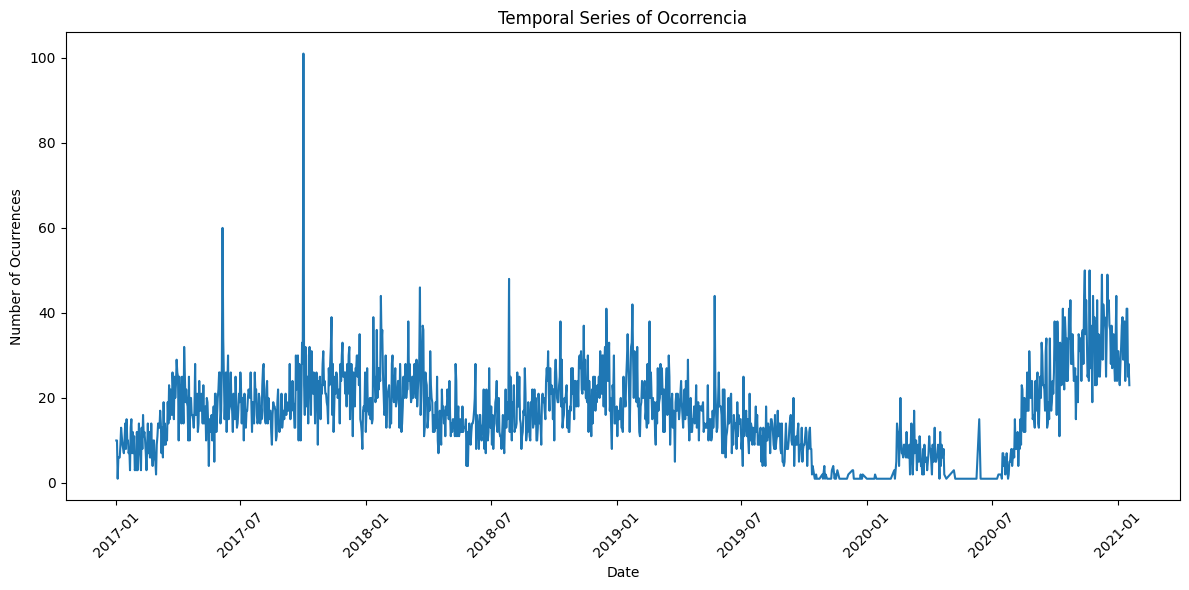

In [ ]:
# prompt: plot a temporal series using df, using a count of ids

# Assuming 'df' is your DataFrame and it has a 'Dates' column representing the time series
# and an 'id_ocorrencia' column to count.

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Dates' column to datetime objects if it's not already
df['Dates'] = pd.to_datetime(df['Dates'])

# Group by 'Dates' and count the number of 'id_ocorrencia' for each date
temporal_series = df.groupby('Dates')['id_ocorrencia'].count()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(temporal_series.index, temporal_series.values)
plt.xlabel('Date')
plt.ylabel('Number of Ocurrences')
plt.title('Temporal Series of Ocorrencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-127-19c19178869d>:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


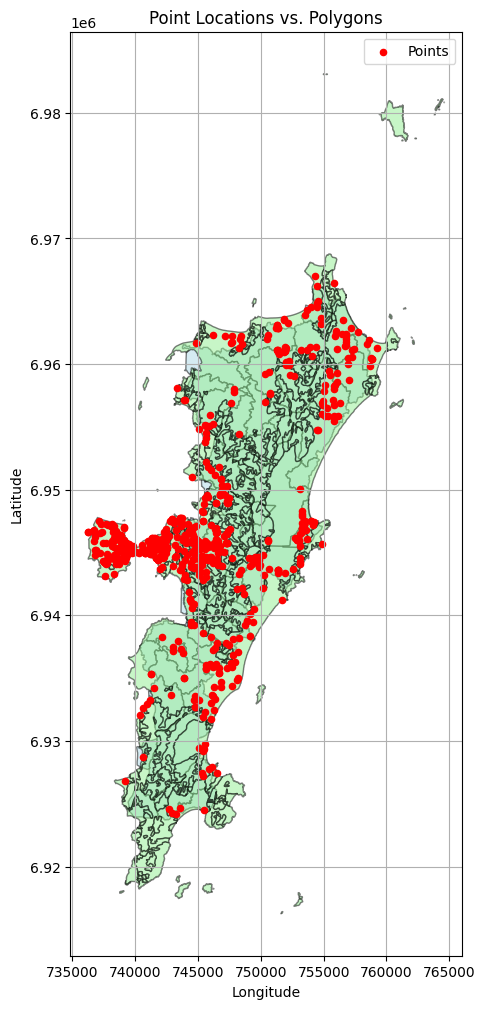

In [ ]:
import matplotlib.pyplot as plt

# Create a plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the polygons from SuscetibilidadeBacias
gdfs["SuscetibilidadeBacias"].plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Suscetibilidade Bacias')

# Plot the polygons from SuscetibilidadeMovimentoDeMassa_UHT
gdfs["SuscetibilidadeMovimentoDeMassa_UHT"].plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.5, label='Movimento de Massa')

# Plot the points from dfFloripa
gdf_floripa.plot(ax=ax, color='red', markersize=20, label='Points')

# Add legend and title
plt.legend()
plt.title('Point Locations vs. Polygons')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


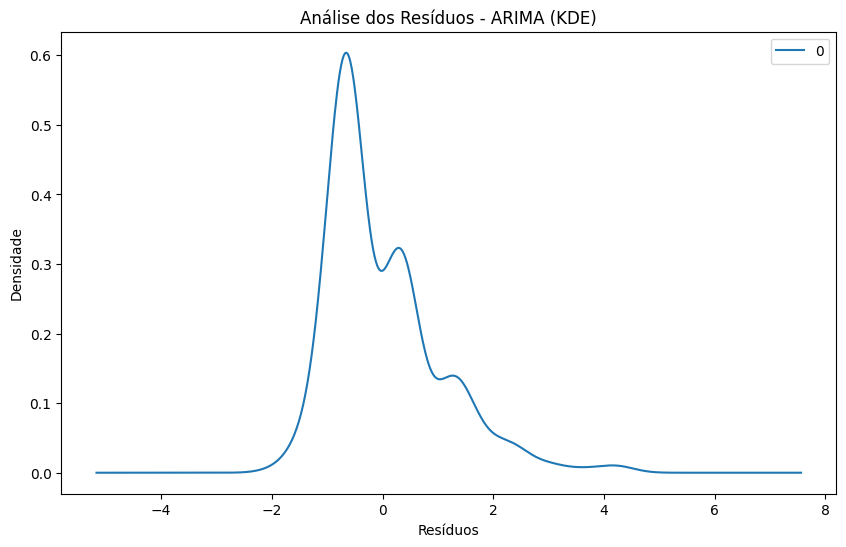

                0
count  501.000000
mean    -0.000643
std      1.017814
min     -1.986510
25%     -0.691218
50%     -0.474010
75%      0.448331
max      4.377445


In [ ]:
# Exemplo de divisão dos dados em treino e teste
train_data, test_data = train_test_split(dfFloripa['Quantity'], test_size=0.2, shuffle=False)

model = ARIMA(train_data, order=(1, 0, 1))
model_fit = model.fit()

# Calculando os resíduos do modelo ARIMA
residuals = pd.DataFrame(model_fit.resid)

# Plotando a distribuição dos resíduos usando KDE (Kernel Density Estimation)
residuals.plot(kind='kde', figsize=(10, 6))
plt.title('Análise dos Resíduos - ARIMA (KDE)')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()

# Exibindo as estatísticas descritivas dos resíduos
print(residuals.describe())

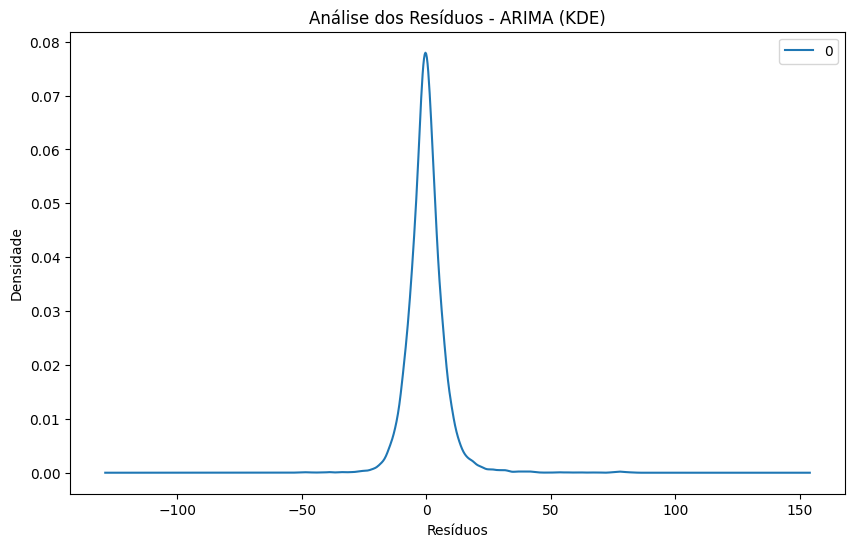

                  0
count  18628.000000
mean      -0.000985
std        7.874396
min      -58.219283
25%       -3.914295
50%       -0.310261
75%        3.294011
max       83.223209


In [ ]:
# Exemplo de divisão dos dados em treino e teste
train_data, test_data = train_test_split(df['Quantity'], test_size=0.2, shuffle=False)

model = ARIMA(train_data, order=(1, 0, 1))
model_fit = model.fit()

# Calculando os resíduos do modelo ARIMA
residuals = pd.DataFrame(model_fit.resid)

# Plotando a distribuição dos resíduos usando KDE (Kernel Density Estimation)
residuals.plot(kind='kde', figsize=(10, 6))
plt.title('Análise dos Resíduos - ARIMA (KDE)')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()

# Exibindo as estatísticas descritivas dos resíduos
print(residuals.describe())

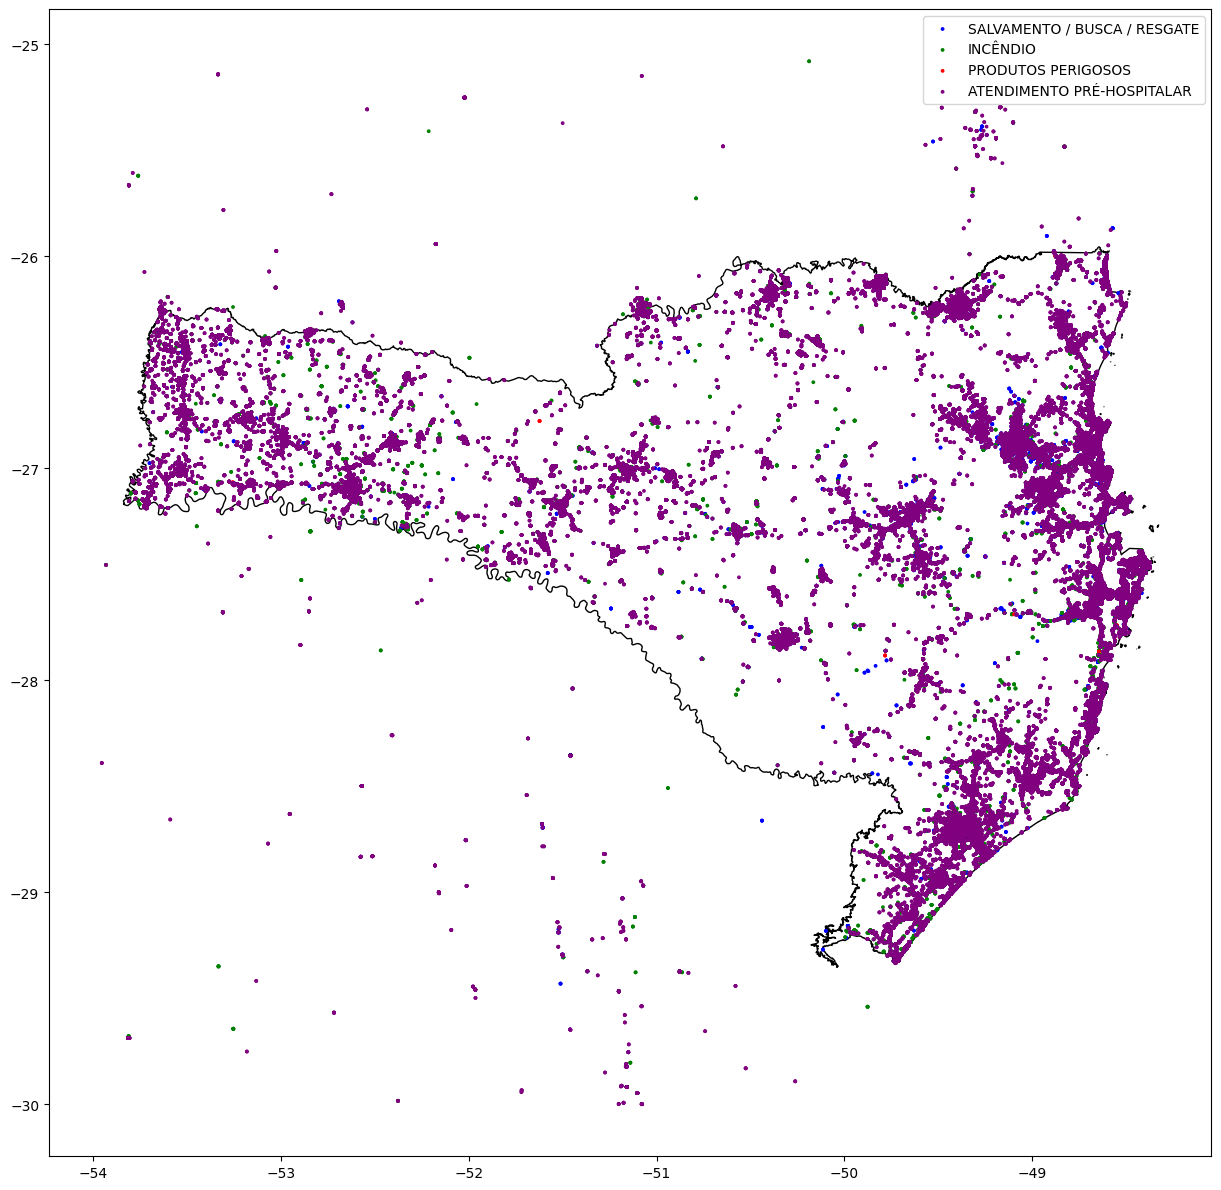

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Example data (replace with your actual data loading)
import pandas as pd
import numpy as np

# Creating geometry from lon_ocorrencia and lat_ocorrencia
geometry = [Point(xy) for xy in zip(df["lon_ocorrencia"], df["lat_ocorrencia"])]

# Creating a GeoDataFrame
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Defining color mapping for "tipo"
tipo_colors = {
    'SALVAMENTO / BUSCA / RESGATE': 'blue',
    'INCÊNDIO': 'green',
    'PRODUTOS PERIGOSOS': 'red',
    'ATENDIMENTO PRÉ-HOSPITALAR': 'purple'
}

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot base map (assuming fmap is loaded correctly)
fmap.plot(ax=ax, color='white', edgecolor='black')

# Plot points based on "tipo" with specified colors
for tipo, color in tipo_colors.items():
    geo_df[geo_df['tipo'] == tipo].plot(ax=ax, color=color, marker='o', markersize=3, label=tipo, linestyle="")

# Adding legend
plt.legend()

# Showing plot
plt.show()


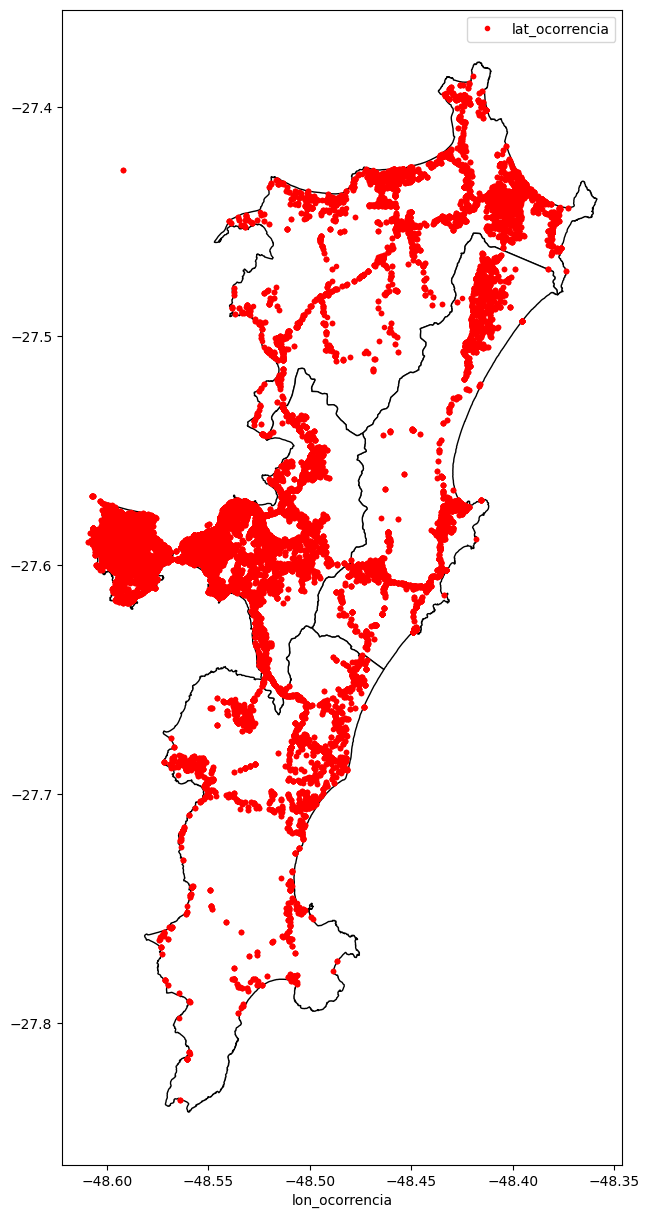

In [ ]:
import shapefile as shp
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

fmap = gpd.read_file("drive/MyDrive/TCC/fpolis_regiao/fpolis_regiao.shp")
crs = {'init' : 'epsg=4326'}

fig,ax = plt.subplots(figsize = (15,15))

ax.set_aspect('equal')

fmap.to_crs(epsg=4326).plot(ax=ax, color='white', edgecolor='black')

geometry = [Point(xy) for xy in zip(dfFloripaDesli["lon_ocorrencia"],dfFloripaDesli["lat_ocorrencia"])]
geometry[:3]

dfFloripaDesli.plot(ax = ax, x = 'lon_ocorrencia', y = 'lat_ocorrencia', color = "red", marker='o', markersize=3, linestyle="")

plt.show()

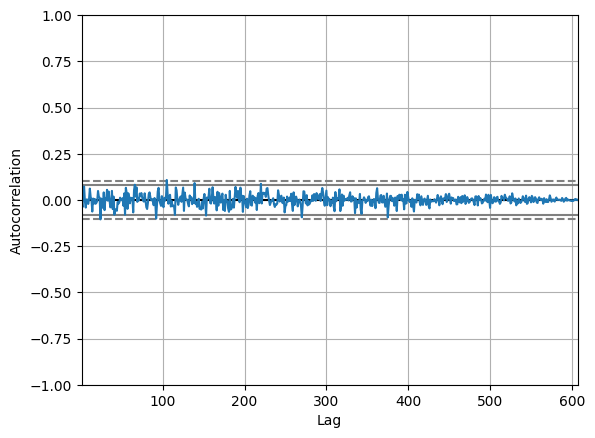

In [ ]:
autocorrelation_plot(dfFloripa_train.lon_ocorrencia)
pyplot.show()

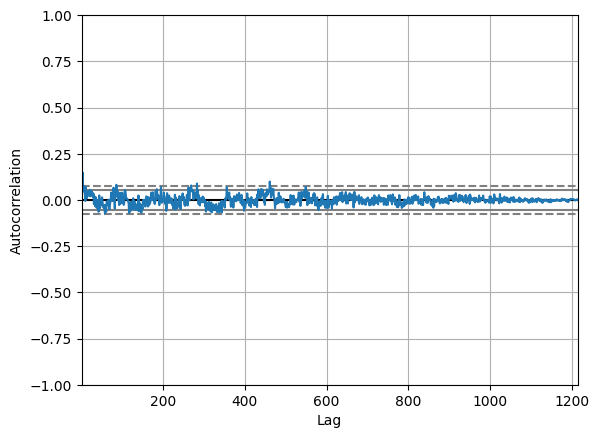

In [ ]:
autocorrelation_plot(dfCopy.Quantity)
pyplot.show()

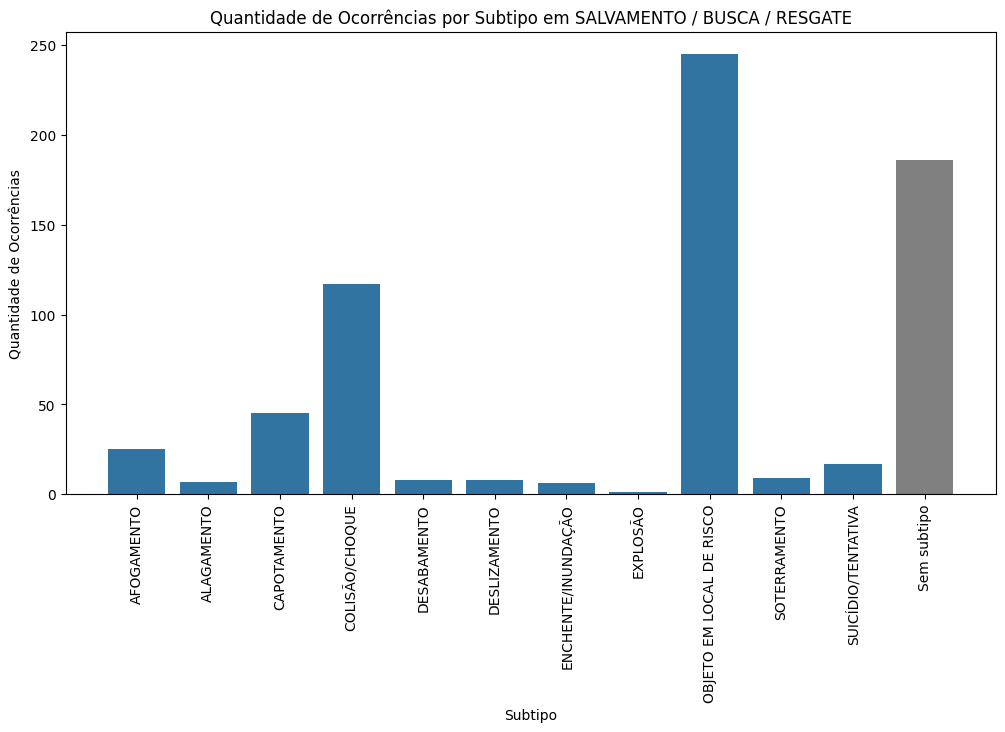

In [ ]:
# prompt: make a graph showing how many id_ocorrencia appear by subtipo  from tipo ATENDIMENTO PRÉ-HOSPITALAR, and make so the subtips names dont overlap

df_APH = dfFloripa[dfFloripa['tipo'] == 'SALVAMENTO / BUSCA / RESGATE']

# Count occurrences by subtipo
df_APH_subtipos = df_APH.groupby('subtipo')['id_ocorrencia'].count().reset_index(name='count')

# Count occurrences without subtipo
df_APH_sem_subtipo = df_APH[df_APH['subtipo'].isna()]['id_ocorrencia'].count()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for subtipos
sns.barplot(x='subtipo', y='count', data=df_APH_subtipos, ax=ax)

# Add a bar for occurrences without subtipo
ax.bar('Sem subtipo', df_APH_sem_subtipo, color='gray')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Set title and labels
ax.set_title('Quantidade de Ocorrências por Subtipo em SALVAMENTO / BUSCA / RESGATE')
ax.set_xlabel('Subtipo')
ax.set_ylabel('Quantidade de Ocorrências')

# Show the plot
plt.show()


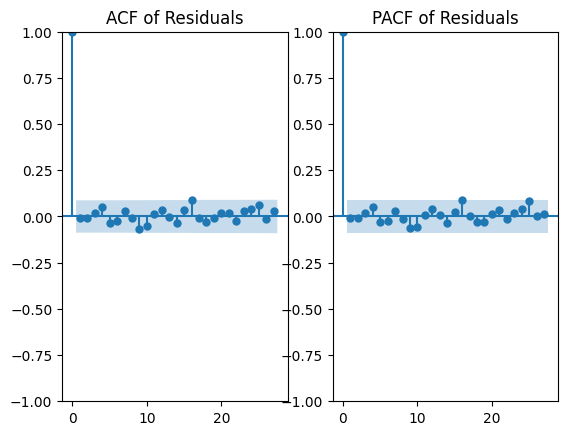

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

residuals = model_fit.resid()
plt.figure()
plt.subplot(121)
plot_acf(residuals, ax=plt.gca(), title="ACF of Residuals")
plt.subplot(122)
plot_pacf(residuals, ax=plt.gca(), title="PACF of Residuals")
plt.show()


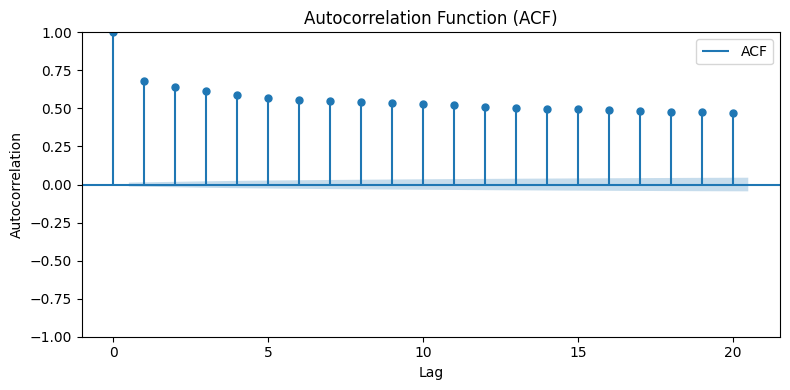

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot the ACF
fig, ax = plt.subplots(figsize=(8, 4))

plot_acf(df['Quantity'], lags=20, ax=ax)
ax.set_title('Autocorrelation Function (ACF)')
ax.set_xlabel('Lag')  # X-axis label
ax.set_ylabel('Autocorrelation')  # Y-axis label
ax.legend(['ACF'], loc='best')  # Add legend

plt.tight_layout()
plt.show()


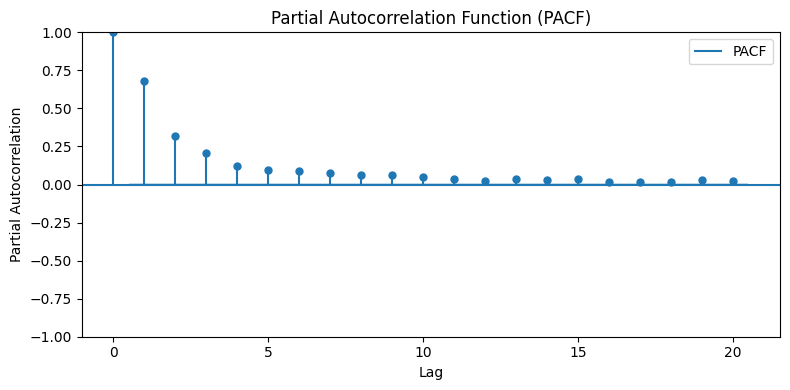

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Plot the PACF
fig, ax = plt.subplots(figsize=(8, 4))

plot_pacf(df['Quantity'], lags=20, ax=ax)
ax.set_title('Partial Autocorrelation Function (PACF)')
ax.set_xlabel('Lag')  # X-axis label
ax.set_ylabel('Partial Autocorrelation')  # Y-axis label
ax.legend(['PACF'], loc='best')  # Add legend

plt.tight_layout()
plt.show()


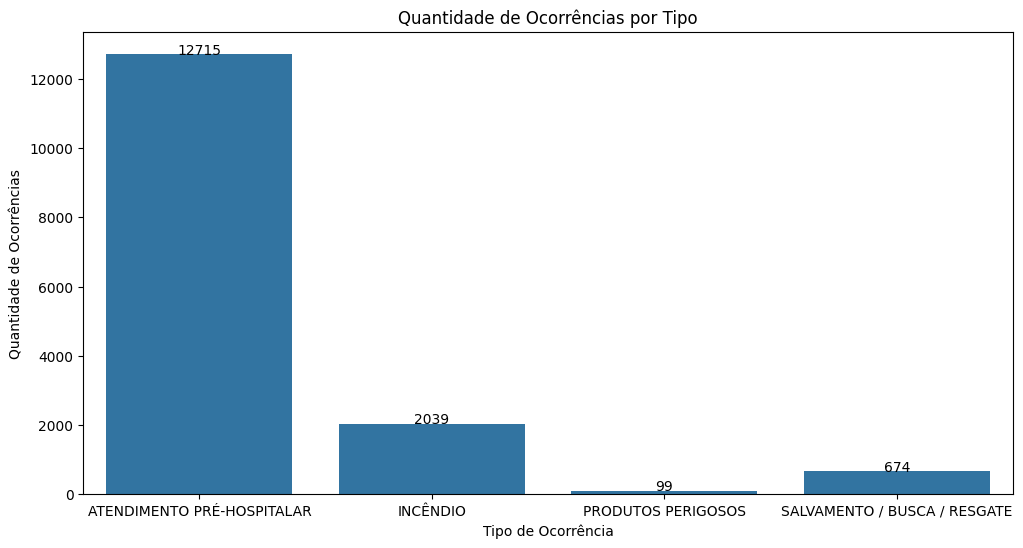

In [ ]:
df_grouped = dfFloripa.groupby('tipo')['id_ocorrencia'].count().reset_index(name='count')

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='tipo', y='count', data=df_grouped)

# Annotate bars with counts
for index, row in df_grouped.iterrows():
    ax.text(index, row['count'], str(row['count']), color='black', ha="center")

# Set title and labels
plt.xlabel('Tipo de Ocorrência')
plt.ylabel('Quantidade de Ocorrências')
plt.title('Quantidade de Ocorrências por Tipo')

# Show the plot
plt.show()